In [1]:
#%matplotlib notebook
import os
import re
import json
import cv2
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from main_classes.DataRetriever import load_npz, DataSearcher
from main_classes.ResultDisplayer import (
    plot_pred,
    plot_prediction,
    plot_mcdropout,
    plot_config_prediction
)

In [4]:
models_for_compare = ["PosScan", "FovSOS-FS", "FovSOS-FS_DirectPred"]

In [5]:
dates_results = {
    #"MCD": "28072021",
    "PosScan": "28072021",
    "FovSOS-FS": "17112021",
    #"FovSOS-FS_DirectPred": "17112021",
    "FovSOS-FS_DirectPred": "25112021"
}

dates_results = {
    "MCD": "28072021",
    "PosScan": "28072021",
    "FovSOS-FS": "04012022", #"FovSOS-FS": "17112021",
    "FovSOS-FS_DirectPred": "25112021" #"FovSOS-FS_DirectPred": "17112021",
}

In [6]:
horizons = {
    1: {
        "MCD": [1, 1], #[N, Nt]
        "PosScan": [1, 1], #[N, Nt]
        "FovSOS-FS": [1, 1],
        "FovSOS-FS_DirectPred": [1, 1],
    },
    5: {
        "MCD": [5, 1],
        "PosScan": [5, 1],
        "FovSOS-FS": [5, 1],
        "FovSOS-FS_DirectPred": [1, 5],
    },
    11: {
        "MCD": [11, 1],
        "PosScan": [11, 1],
        "FovSOS-FS": [11, 1],
        "FovSOS-FS_DirectPred": [1, 11],
    },
    20: {
        "MCD": [20, 1],
        "PosScan": [20, 1],
        "FovSOS-FS": [20, 1],
        "FovSOS-FS_DirectPred": [1, 20],
    }
    
}

In [7]:
results_filepaths = [os.path.join("../results/", model_name) for model_name in models_for_compare]
IMGS_FOLDER = '../../../data/images/'
HEIGHT = 768
WIDTH = 1024
SAVE_FOLDER = "../results_plots/model_comparison/"

In [8]:
results_filepaths

['../results/PosScan',
 '../results/FovSOS-FS',
 '../results/FovSOS-FS_DirectPred']

In [9]:
assets_all_results_filepaths = [os.path.join("../results/assets/", model_name, f"results_all_{dates_results[model_name]}.json") for model_name in models_for_compare]
assets_all_vs_all_results_filepaths = [os.path.join("../results/assets/", model_name, f"results_all_vs_all{dates_results[model_name]}.json") for model_name in models_for_compare]

In [10]:
# Get all_results
all_results_list = []
for assets_filepath in assets_all_results_filepaths:
    with open(assets_filepath) as data_file:
        results = json.load(data_file)
    all_results_list.append(results)

In [11]:
display_summary_table = True
is_save = False

searcher = DataSearcher()

In [12]:
#METRICS = ["MSE", "peak_x", "peak_y", "dtw", "scanmatch", "rec"]
METRICS = ["MSE", "peak_x", "peak_y", "scanmatch"]
IMG_TYPES = ["natural", "white", "black", "grey", "inverted", "pink_noise", "white_noise"]

In [13]:
train_images = ["natural"] # "all"
predIMG = "natural" #None

In [14]:
x_lim_right = {
    #"MSE": {
    #    1: 1e4,
    #    5: 1e5,
    #    11: 0.5e6,
    #    20: 0.6e6
    #}
}

MSE


$\mu_{h=1}$  $\sigma_{h=1}$  $\mu_{h=5}$  \
PosScan               2215.600058      774.863423  3453.920054   
FovSOS-FS              696.499681      296.970393  1229.752205   
FovSOS-FS_DirectPred   650.128109      250.547299  1222.825913   

                      $\sigma_{h=5}$  $\mu_{h=11}$  $\sigma_{h=11}$  \
PosScan                   976.280367   9019.050802      2593.543644   
FovSOS-FS                 416.692733   2732.067042       741.583663   
FovSOS-FS_DirectPred      491.639839   2097.094818       736.760836   

                      $\mu_{h=20}$  $\sigma_{h=20}$  
PosScan               18817.999208      5190.394032  
FovSOS-FS              5185.634188      1254.265233  
FovSOS-FS_DirectPred   3378.324730       976.657156

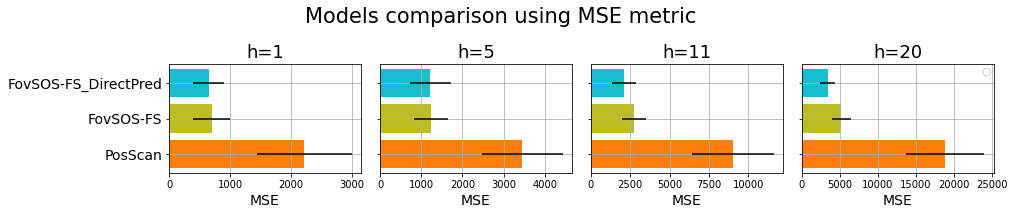

peak_x


$\mu_{h=1}$  $\sigma_{h=1}$  $\mu_{h=5}$  \
PosScan                  5.555556        1.666667     8.888889   
FovSOS-FS                5.000000        2.500000     9.444444   
FovSOS-FS_DirectPred     4.444444        1.666667     9.444444   

                      $\sigma_{h=5}$  $\mu_{h=11}$  $\sigma_{h=11}$  \
PosScan                     2.204793     15.000000         0.000000   
FovSOS-FS                   1.666667     14.444444         1.666667   
FovSOS-FS_DirectPred        1.666667     14.444444         1.666667   

                      $\mu_{h=20}$  $\sigma_{h=20}$  
PosScan                  22.222222         2.635231  
FovSOS-FS                22.777778         2.635231  
FovSOS-FS_DirectPred     24.444444         1.666667

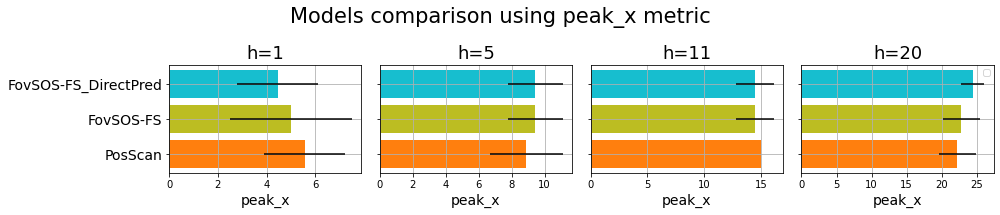

peak_y


$\mu_{h=1}$  $\sigma_{h=1}$  $\mu_{h=5}$  \
PosScan                  6.111111        2.204793     8.333333   
FovSOS-FS                4.444444        3.004626     7.777778   
FovSOS-FS_DirectPred     4.444444        3.004626     8.888889   

                      $\sigma_{h=5}$  $\mu_{h=11}$  $\sigma_{h=11}$  \
PosScan                     2.500000          15.0              0.0   
FovSOS-FS                   2.635231          15.0              0.0   
FovSOS-FS_DirectPred        2.204793          15.0              2.5   

                      $\mu_{h=20}$  $\sigma_{h=20}$  
PosScan                  21.111111         2.204793  
FovSOS-FS                21.666667         2.500000  
FovSOS-FS_DirectPred     24.444444         1.666667

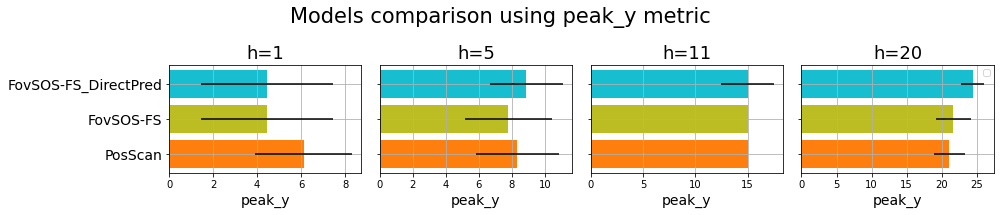

scanmatch


$\mu_{h=1}$  $\sigma_{h=1}$  $\mu_{h=5}$  \
PosScan                  0.832678        0.041900     0.800099   
FovSOS-FS                0.915200        0.023576     0.901819   
FovSOS-FS_DirectPred     0.917592        0.023998     0.917746   

                      $\sigma_{h=5}$  $\mu_{h=11}$  $\sigma_{h=11}$  \
PosScan                     0.038777      0.708858         0.044585   
FovSOS-FS                   0.022934      0.866467         0.019403   
FovSOS-FS_DirectPred        0.024758      0.908754         0.021912   

                      $\mu_{h=20}$  $\sigma_{h=20}$  
PosScan                   0.608784         0.051316  
FovSOS-FS                 0.814705         0.031050  
FovSOS-FS_DirectPred      0.888379         0.021863

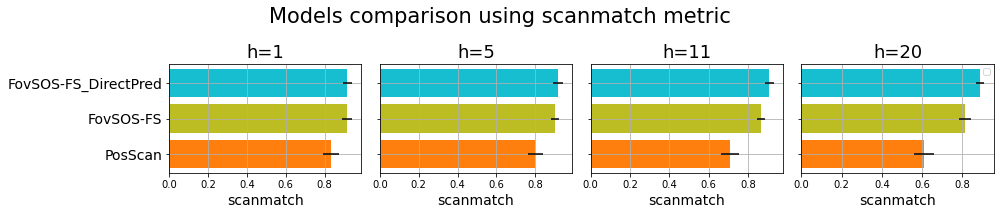

In [44]:
for metric in METRICS: #["rec", "det"]:
    fig, ax = plt.subplots(1, 4, figsize=(14, 3), sharey=True)
    arr_n = []
    for i, h in enumerate([1, 5, 11, 20]):
        arr_type = []
        for k, (model_name, all_results) in enumerate(zip(models_for_compare, all_results_list)):
            N, Nt = horizons[h][model_name]
            for j, img_type in enumerate(train_images):
                if img_type == "all":
                    tIMG = None
                else:
                    tIMG = img_type
                df = searcher.get_results_by_query(all_results, 
                                 metric=metric, 
                                 subject=None, 
                                 tIMG=tIMG, 
                                 N=N,
                                 Nt=Nt,
                                 predIMG=predIMG #"natural"
                                )
                mu, sigma = df[0].mean(), df[0].std() 
                # Choose plot type
                if not df.empty:
                    if k == 0:
                        color = f"C{k+1}"
                    else:
                        color = f"C{k+7}"
                    ax[i].barh(model_name, df[0].mean(), xerr=df[0].std(), color=color)
                if (metric == "MSE") or (metric == "dtw"):
                    ax[i].set_xlim(left=0)
                arr_type.append([mu, sigma])
        ax[i].set_title(f"h={h}", fontsize=18)
        ax[i].set_xlabel(metric, fontsize=14)
        ax[i].tick_params(axis='y', labelsize=14)
        ax[i].set_xlim(left=0, right=x_lim_right.get(metric, {}).get(h, None))
        ax[i].grid()
        arr_n.append(arr_type)
    if display_summary_table:
        # DISPLAY TABLE
        df_types = pd.DataFrame(np.array(arr_n).swapaxes(0, 1).reshape(3, -1), 
                                index=models_for_compare
                               )
        df_types.columns = [r"$\mu_{h=1}$", r"$\sigma_{h=1}$", r"$\mu_{h=5}$", r"$\sigma_{h=5}$", r"$\mu_{h=11}$", r"$\sigma_{h=11}$", r"$\mu_{h=20}$", r"$\sigma_{h=20}$"]
        print(metric)
        display(df_types)
    ax[i].legend(prop={"size":8})
    plt.suptitle(f"Models comparison using {metric} metric", fontsize=21)
    fig.tight_layout()
    if is_save:
        savepath = os.path.join(SAVE_FOLDER, "v2")
        if not os.path.exists(savepath):
            os.makedirs(savepath)
        fig.savefig(f"{os.path.join(savepath, f'{metric}_bar_model_comparison_v2')}.png")
    plt.show()

MSE


$\mu_{h=1}$  $\sigma_{h=1}$  $\mu_{h=5}$  \
PosScan               2215.600058      774.863423  3453.920054   
FovSOS-FS              696.499681      296.970393  1229.752205   
FovSOS-FS_DirectPred   650.128109      250.547299  1222.825913   

                      $\sigma_{h=5}$  $\mu_{h=11}$  $\sigma_{h=11}$  \
PosScan                   976.280367   9019.050802      2593.543644   
FovSOS-FS                 416.692733   2732.067042       741.583663   
FovSOS-FS_DirectPred      491.639839   2097.094818       736.760836   

                      $\mu_{h=20}$  $\sigma_{h=20}$  
PosScan               18817.999208      5190.394032  
FovSOS-FS              5185.634188      1254.265233  
FovSOS-FS_DirectPred   3378.324730       976.657156

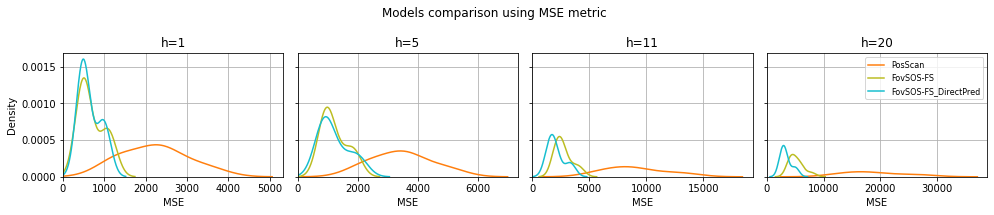

peak_x


$\mu_{h=1}$  $\sigma_{h=1}$  $\mu_{h=5}$  \
PosScan                  5.555556        1.666667     8.888889   
FovSOS-FS                5.000000        2.500000     9.444444   
FovSOS-FS_DirectPred     4.444444        1.666667     9.444444   

                      $\sigma_{h=5}$  $\mu_{h=11}$  $\sigma_{h=11}$  \
PosScan                     2.204793     15.000000         0.000000   
FovSOS-FS                   1.666667     14.444444         1.666667   
FovSOS-FS_DirectPred        1.666667     14.444444         1.666667   

                      $\mu_{h=20}$  $\sigma_{h=20}$  
PosScan                  22.222222         2.635231  
FovSOS-FS                22.777778         2.635231  
FovSOS-FS_DirectPred     24.444444         1.666667

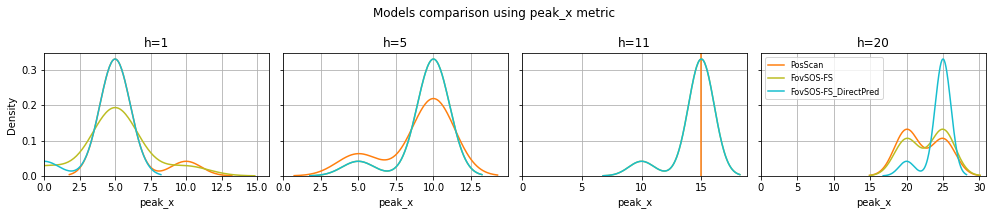

peak_y


$\mu_{h=1}$  $\sigma_{h=1}$  $\mu_{h=5}$  \
PosScan                  6.111111        2.204793     8.333333   
FovSOS-FS                4.444444        3.004626     7.777778   
FovSOS-FS_DirectPred     4.444444        3.004626     8.888889   

                      $\sigma_{h=5}$  $\mu_{h=11}$  $\sigma_{h=11}$  \
PosScan                     2.500000          15.0              0.0   
FovSOS-FS                   2.635231          15.0              0.0   
FovSOS-FS_DirectPred        2.204793          15.0              2.5   

                      $\mu_{h=20}$  $\sigma_{h=20}$  
PosScan                  21.111111         2.204793  
FovSOS-FS                21.666667         2.500000  
FovSOS-FS_DirectPred     24.444444         1.666667

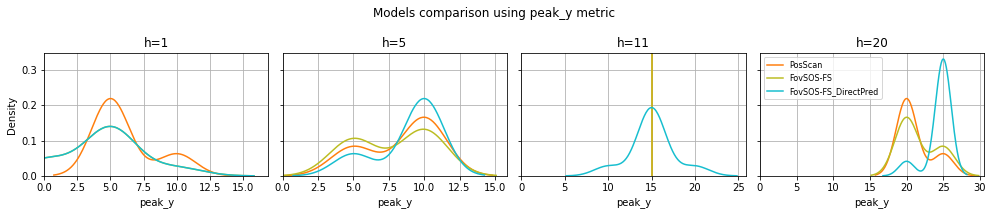

scanmatch


$\mu_{h=1}$  $\sigma_{h=1}$  $\mu_{h=5}$  \
PosScan                  0.832678        0.041900     0.800099   
FovSOS-FS                0.915200        0.023576     0.901819   
FovSOS-FS_DirectPred     0.917592        0.023998     0.917746   

                      $\sigma_{h=5}$  $\mu_{h=11}$  $\sigma_{h=11}$  \
PosScan                     0.038777      0.708858         0.044585   
FovSOS-FS                   0.022934      0.866467         0.019403   
FovSOS-FS_DirectPred        0.024758      0.908754         0.021912   

                      $\mu_{h=20}$  $\sigma_{h=20}$  
PosScan                   0.608784         0.051316  
FovSOS-FS                 0.814705         0.031050  
FovSOS-FS_DirectPred      0.888379         0.021863

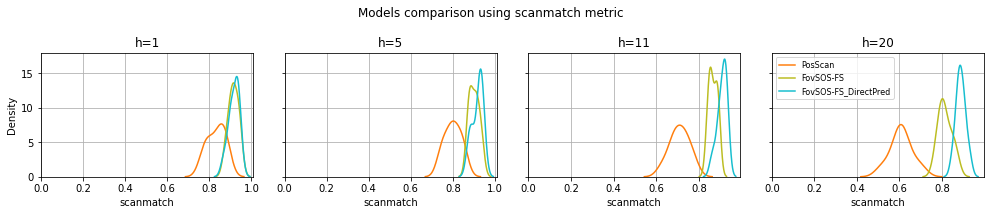

In [16]:
for metric in METRICS: #["rec", "det"]:
    fig, ax = plt.subplots(1, 4, figsize=(14, 3), sharey=True)
    arr_n = []
    for i, h in enumerate([1, 5, 11, 20]):
        arr_type = []
        for k, (model_name, all_results) in enumerate(zip(models_for_compare, all_results_list)):
            N, Nt = horizons[h][model_name]
            for j, img_type in enumerate(train_images):
                if img_type == "all":
                    tIMG = None
                else:
                    tIMG = img_type
                df = searcher.get_results_by_query(all_results, 
                                 metric=metric, 
                                 subject=None, 
                                 tIMG=tIMG, 
                                 N=N,
                                 Nt=Nt,
                                 predIMG=predIMG #"natural"
                                )
                mu, sigma = df[0].mean(), df[0].std() 
                # Choose plot type
                if not df.empty:
                    if k == 0:
                        color = f"C{k+1}"
                    else:
                        color = f"C{k+7}"
                    #ax[i].barh(model_name, df[0].mean(), xerr=df[0].std(), color=color)
                    if (not df.empty) and (not pd.isna(df[0]).all()):
                        if df[0].std() != 0:
                            sns.kdeplot(df[0], ax=ax[i], label=model_name, color=color)
                        else:
                            ax[i].axvline(x=df[0].mean(), label=model_name, color=color)
                    else:
                        ax[i].axvline(x=0.0, label=model_name, color=color)
                if (metric == "MSE") or (metric == "dtw"):
                    ax[i].set_xlim(left=0)
                arr_type.append([mu, sigma])
        ax[i].set_title(f"h={h}")
        ax[i].set_xlabel(metric)
        ax[i].set_xlim(left=0, right=x_lim_right.get(metric, {}).get(h, None))
        ax[i].grid()
        arr_n.append(arr_type)
    if display_summary_table:
        # DISPLAY TABLE
        df_types = pd.DataFrame(np.array(arr_n).swapaxes(0, 1).reshape(3, -1), 
                                index=models_for_compare
                               )
        df_types.columns = [r"$\mu_{h=1}$", r"$\sigma_{h=1}$", r"$\mu_{h=5}$", r"$\sigma_{h=5}$", r"$\mu_{h=11}$", r"$\sigma_{h=11}$", r"$\mu_{h=20}$", r"$\sigma_{h=20}$"]
        print(metric)
        display(df_types)
    ax[i].legend(prop={"size":8})
    plt.suptitle(f"Models comparison using {metric} metric")
    fig.tight_layout()
    if False:
        savepath = os.path.join(SAVE_FOLDER, "v2")
        if not os.path.exists(savepath):
            os.makedirs(savepath)
        fig.savefig(f"{os.path.join(savepath, f'{metric}_dist_model_comparison_v2')}.png")
    plt.show()

MSE


$\mu_{h=1}$  $\sigma_{h=1}$  $\mu_{h=5}$  \
PosScan               2215.600058      774.863423  3453.920054   
FovSOS-FS              696.499681      296.970393  1229.752205   
FovSOS-FS_DirectPred   650.128109      250.547299  1222.825913   

                      $\sigma_{h=5}$  $\mu_{h=11}$  $\sigma_{h=11}$  \
PosScan                   976.280367   9019.050802      2593.543644   
FovSOS-FS                 416.692733   2732.067042       741.583663   
FovSOS-FS_DirectPred      491.639839   2097.094818       736.760836   

                      $\mu_{h=20}$  $\sigma_{h=20}$  
PosScan               18817.999208      5190.394032  
FovSOS-FS              5185.634188      1254.265233  
FovSOS-FS_DirectPred   3378.324730       976.657156

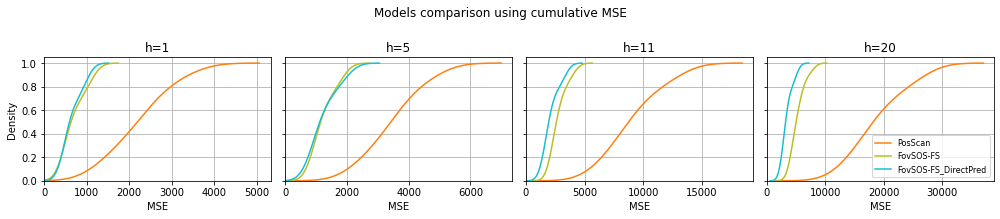

peak_x


$\mu_{h=1}$  $\sigma_{h=1}$  $\mu_{h=5}$  \
PosScan                  5.555556        1.666667     8.888889   
FovSOS-FS                5.000000        2.500000     9.444444   
FovSOS-FS_DirectPred     4.444444        1.666667     9.444444   

                      $\sigma_{h=5}$  $\mu_{h=11}$  $\sigma_{h=11}$  \
PosScan                     2.204793     15.000000         0.000000   
FovSOS-FS                   1.666667     14.444444         1.666667   
FovSOS-FS_DirectPred        1.666667     14.444444         1.666667   

                      $\mu_{h=20}$  $\sigma_{h=20}$  
PosScan                  22.222222         2.635231  
FovSOS-FS                22.777778         2.635231  
FovSOS-FS_DirectPred     24.444444         1.666667

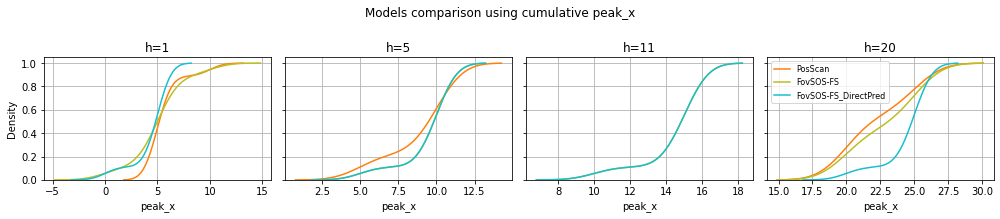

peak_y


$\mu_{h=1}$  $\sigma_{h=1}$  $\mu_{h=5}$  \
PosScan                  6.111111        2.204793     8.333333   
FovSOS-FS                4.444444        3.004626     7.777778   
FovSOS-FS_DirectPred     4.444444        3.004626     8.888889   

                      $\sigma_{h=5}$  $\mu_{h=11}$  $\sigma_{h=11}$  \
PosScan                     2.500000          15.0              0.0   
FovSOS-FS                   2.635231          15.0              0.0   
FovSOS-FS_DirectPred        2.204793          15.0              2.5   

                      $\mu_{h=20}$  $\sigma_{h=20}$  
PosScan                  21.111111         2.204793  
FovSOS-FS                21.666667         2.500000  
FovSOS-FS_DirectPred     24.444444         1.666667

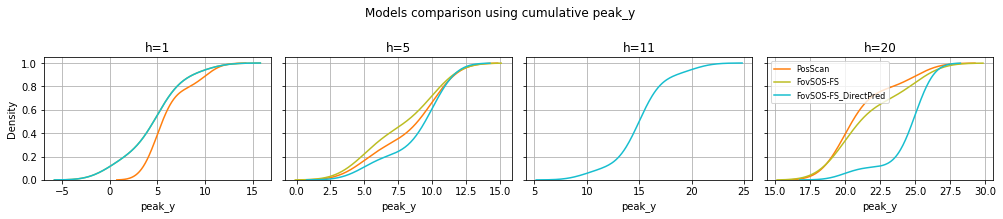

scanmatch


$\mu_{h=1}$  $\sigma_{h=1}$  $\mu_{h=5}$  \
PosScan                  0.832678        0.041900     0.800099   
FovSOS-FS                0.915200        0.023576     0.901819   
FovSOS-FS_DirectPred     0.917592        0.023998     0.917746   

                      $\sigma_{h=5}$  $\mu_{h=11}$  $\sigma_{h=11}$  \
PosScan                     0.038777      0.708858         0.044585   
FovSOS-FS                   0.022934      0.866467         0.019403   
FovSOS-FS_DirectPred        0.024758      0.908754         0.021912   

                      $\mu_{h=20}$  $\sigma_{h=20}$  
PosScan                   0.608784         0.051316  
FovSOS-FS                 0.814705         0.031050  
FovSOS-FS_DirectPred      0.888379         0.021863

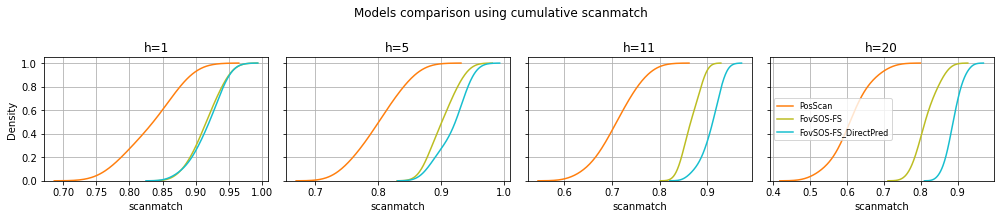

In [17]:
for metric in METRICS: #["rec", "det"]:
    fig, ax = plt.subplots(1, 4, figsize=(14, 3), sharey=True)
    arr_n = []
    for i, h in enumerate([1, 5, 11, 20]):
    #for i, Nt in enumerate([5, 11, 20]):
        arr_type = []
        #for j, img_type in enumerate(IMG_TYPES):
        #for j, img_type in enumerate(["natural"]):
        for k, (model_name, all_results) in enumerate(zip(models_for_compare, all_results_list)):
            N, Nt = horizons[h][model_name]
            for j, img_type in enumerate(train_images):
                if img_type == "all":
                    tIMG = None
                else:
                    tIMG = img_type
                df = searcher.get_results_by_query(all_results, 
                                 metric=metric, 
                                 subject=None, 
                                 tIMG=tIMG, 
                                 N=N,
                                 Nt=Nt,
                                 predIMG=predIMG
                                )
                mu, sigma = df[0].mean(), df[0].std() 
                # Choose plot type
                if not df.empty:
                    if k == 0:
                        color = f"C{k+1}"
                    else:
                        color = f"C{k+7}"
                    sns.kdeplot(df[0], ax=ax[i], label=model_name, cumulative=True, color=color)
                
                # x_lim
                if (metric == "MSE") or (metric == "dtw"):
                    #ax[i].set_xlim(left=-2*df[0].min(),right=2*df[0].max())
                    #ax[i].set_xlim(left=df[0].min())
                    ax[i].set_xlim(left=0)
                arr_type.append([mu, sigma])
        ax[i].set_title(f"h={h}")
        ax[i].set_xlabel(metric)
        ax[i].grid()
        arr_n.append(arr_type)
    if display_summary_table:
        # DISPLAY TABLE
        df_types = pd.DataFrame(np.array(arr_n).swapaxes(0, 1).reshape(3, -1), 
                                index=models_for_compare
                               )
        df_types.columns = [r"$\mu_{h=1}$", r"$\sigma_{h=1}$", r"$\mu_{h=5}$", r"$\sigma_{h=5}$", r"$\mu_{h=11}$", r"$\sigma_{h=11}$", r"$\mu_{h=20}$", r"$\sigma_{h=20}$"]
        print(metric)
        display(df_types)
    ax[i].legend(prop={"size":8})
    plt.suptitle(f"Models comparison using cumulative {metric}", y=1.0)
    fig.tight_layout()
    if is_save:
        savepath = os.path.join(SAVE_FOLDER, "v2")
        if not os.path.exists(savepath):
            os.makedirs(savepath)
        fig.savefig(f"{os.path.join(savepath, f'{metric}_cumdist_model_comparison_v2')}.png")
    plt.show()

multimatch


$\mu_{h=1}$  $\sigma_{h=1}$  $\mu_{h=5}$  \
PosScan                  0.996044        0.001176     0.995689   
FovSOS-FS                0.996776        0.000600     0.996691   
FovSOS-FS_DirectPred     0.997022        0.000608     0.996814   

                      $\sigma_{h=5}$  $\mu_{h=11}$  $\sigma_{h=11}$  \
PosScan                     0.001486      0.993696         0.002207   
FovSOS-FS                   0.000784      0.995068         0.001264   
FovSOS-FS_DirectPred        0.000582      0.996623         0.000540   

                      $\mu_{h=20}$  $\sigma_{h=20}$  
PosScan                   0.991606         0.003420  
FovSOS-FS                 0.993385         0.002264  
FovSOS-FS_DirectPred      0.996150         0.000527

No handles with labels found to put in legend.


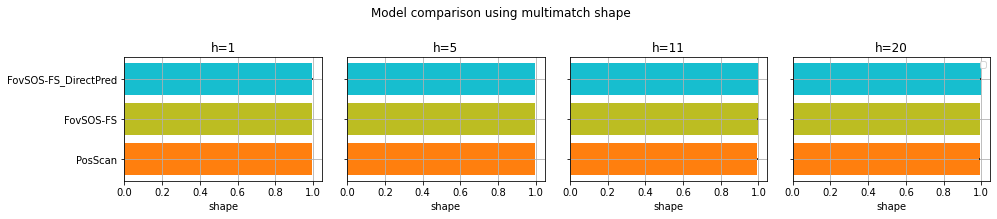

multimatch


$\mu_{h=1}$  $\sigma_{h=1}$  $\mu_{h=5}$  \
PosScan                  0.940379        0.024860     0.933393   
FovSOS-FS                0.952601        0.025961     0.946871   
FovSOS-FS_DirectPred     0.951667        0.027363     0.948523   

                      $\sigma_{h=5}$  $\mu_{h=11}$  $\sigma_{h=11}$  \
PosScan                     0.021338      0.895914         0.027462   
FovSOS-FS                   0.030212      0.920845         0.034491   
FovSOS-FS_DirectPred        0.034089      0.947419         0.031741   

                      $\mu_{h=20}$  $\sigma_{h=20}$  
PosScan                   0.846200         0.029133  
FovSOS-FS                 0.895132         0.036354  
FovSOS-FS_DirectPred      0.934819         0.039451

No handles with labels found to put in legend.


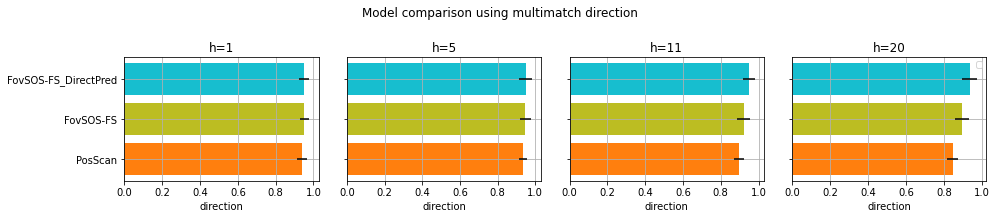

multimatch


$\mu_{h=1}$  $\sigma_{h=1}$  $\mu_{h=5}$  \
PosScan                  0.995523        0.000987     0.995220   
FovSOS-FS                0.995893        0.000696     0.996172   
FovSOS-FS_DirectPred     0.996272        0.000743     0.996092   

                      $\sigma_{h=5}$  $\mu_{h=11}$  $\sigma_{h=11}$  \
PosScan                     0.001228      0.992806         0.002018   
FovSOS-FS                   0.000930      0.994253         0.001678   
FovSOS-FS_DirectPred        0.000798      0.995879         0.000808   

                      $\mu_{h=20}$  $\sigma_{h=20}$  
PosScan                   0.990289         0.003776  
FovSOS-FS                 0.992373         0.002992  
FovSOS-FS_DirectPred      0.994770         0.000865

No handles with labels found to put in legend.


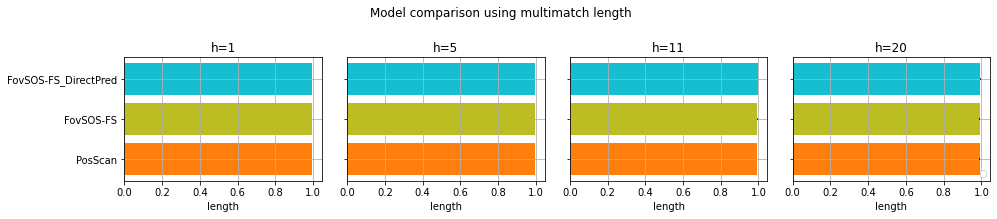

multimatch


$\mu_{h=1}$  $\sigma_{h=1}$  $\mu_{h=5}$  \
PosScan                  0.975793        0.005952     0.969558   
FovSOS-FS                0.992149        0.001345     0.989606   
FovSOS-FS_DirectPred     0.992679        0.000710     0.992193   

                      $\sigma_{h=5}$  $\mu_{h=11}$  $\sigma_{h=11}$  \
PosScan                     0.006453      0.948441         0.009927   
FovSOS-FS                   0.002111      0.981752         0.003931   
FovSOS-FS_DirectPred        0.001102      0.991461         0.001190   

                      $\mu_{h=20}$  $\sigma_{h=20}$  
PosScan                   0.923357         0.013618  
FovSOS-FS                 0.972184         0.005231  
FovSOS-FS_DirectPred      0.988716         0.001253

No handles with labels found to put in legend.


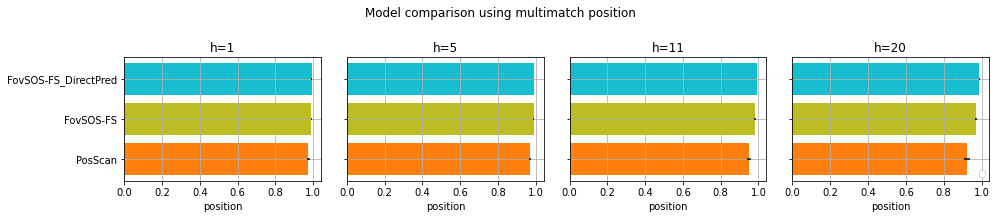

multimatch


$\mu_{h=1}$  $\sigma_{h=1}$  $\mu_{h=5}$  \
PosScan                  0.754574        0.223593     0.768495   
FovSOS-FS                0.722394        0.237449     0.762599   
FovSOS-FS_DirectPred     0.730607        0.243803     0.727533   

                      $\sigma_{h=5}$  $\mu_{h=11}$  $\sigma_{h=11}$  \
PosScan                     0.223787      0.697131         0.242776   
FovSOS-FS                   0.220422      0.714491         0.231256   
FovSOS-FS_DirectPred        0.216729      0.719308         0.232010   

                      $\mu_{h=20}$  $\sigma_{h=20}$  
PosScan                   0.655132         0.226566  
FovSOS-FS                 0.661559         0.210050  
FovSOS-FS_DirectPred      0.697363         0.229766

No handles with labels found to put in legend.


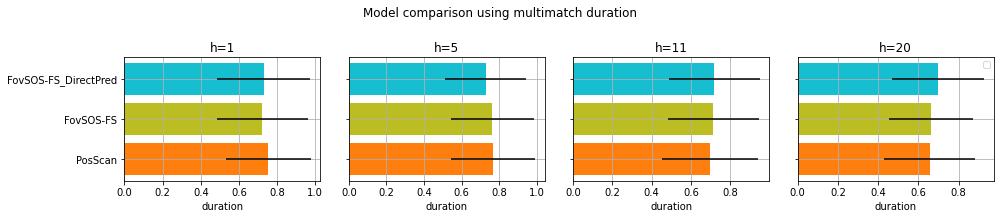

In [18]:
metric = "multimatch"
MULTIMATCH_DIMS = ["shape", "direction", "length", "position", "duration"]

for m_dim, multimatch_dim in enumerate(MULTIMATCH_DIMS):
    fig, ax = plt.subplots(1, 4, figsize=(14, 3), sharey=True)
    #fig, ax = plt.subplots(1, 3, figsize=(14, 3))
    arr_n = []
    for i, h in enumerate([1, 5, 11, 20]):
    #for i, Nt in enumerate([5, 11, 20]):
        arr_type = []
        for k, (model_name, all_results) in enumerate(zip(models_for_compare, all_results_list)):
            N, Nt = horizons[h][model_name]
            for j, img_type in enumerate(train_images):
                if img_type == "all":
                    tIMG = None
                else:
                    tIMG = img_type
                df = searcher.get_results_by_query(all_results, 
                                 metric=metric, 
                                 subject=None, 
                                 tIMG=tIMG, 
                                 N=N, 
                                 Nt=Nt, 
                                 predIMG=predIMG
                                )[0].apply(pd.Series)
                mu, sigma = df[m_dim].mean(), df[m_dim].std() 
                #sns.distplot(df[m_dim], ax=ax[i], label=model_name, hist=False, kde=True)
                if not df.empty:
                    if k == 0:
                        color = f"C{k+1}"
                    else:
                        color = f"C{k+7}"
                    ax[i].barh(model_name, df[m_dim].mean(), xerr=df[m_dim].std(), color=color)
                arr_type.append([mu, sigma])
        ax[i].set_title(f"h={h}")
        ax[i].grid()
        ax[i].set_xlabel(multimatch_dim)
        arr_n.append(arr_type)
    if display_summary_table:
        # DISPLAY TABLE
        df_types = pd.DataFrame(np.array(arr_n).swapaxes(0, 1).reshape(3, -1), 
                                index=models_for_compare
                               )
        df_types.columns = [r"$\mu_{h=1}$", r"$\sigma_{h=1}$", r"$\mu_{h=5}$", r"$\sigma_{h=5}$", r"$\mu_{h=11}$", r"$\sigma_{h=11}$", r"$\mu_{h=20}$", r"$\sigma_{h=20}$"]
        print(metric)
        display(df_types)
    ax[i].legend(prop={"size":8})
    plt.suptitle(f"Model comparison using {metric} {multimatch_dim}", y=1.0)
    fig.tight_layout()
    if is_save:
        savepath = os.path.join(SAVE_FOLDER, "v2")
        if not os.path.exists(savepath):
            os.makedirs(savepath)
        fig.savefig(f"{os.path.join(savepath, f'{metric}_{multimatch_dim}_bar_model_comparison_v2')}.png")
    plt.show()

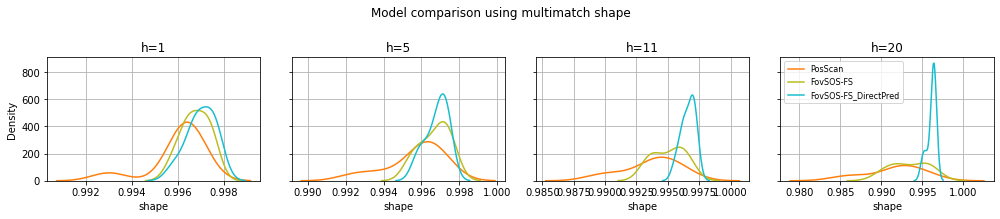

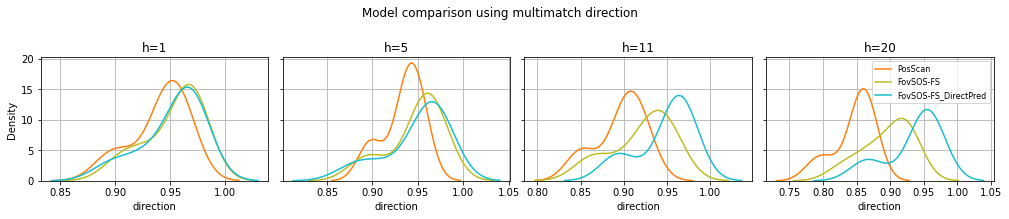

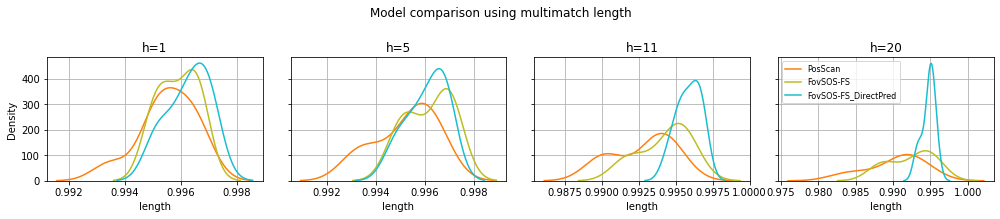

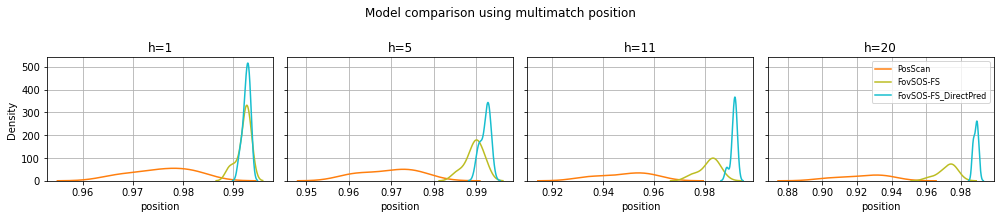

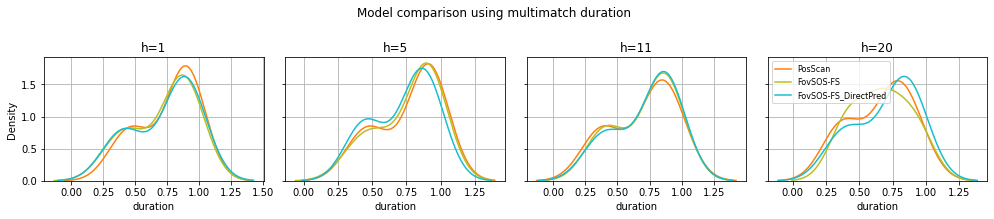

In [19]:
metric = "multimatch"
MULTIMATCH_DIMS = ["shape", "direction", "length", "position", "duration"]

for m_dim, multimatch_dim in enumerate(MULTIMATCH_DIMS):
    fig, ax = plt.subplots(1, 4, figsize=(14, 3), sharey=True)
    for i, h in enumerate([1, 5, 11, 20]):
        arr_type = []
        for k, (model_name, all_results) in enumerate(zip(models_for_compare, all_results_list)):
            N, Nt = horizons[h][model_name]
            for j, img_type in enumerate(train_images):
                if img_type == "all":
                    tIMG = None
                else:
                    tIMG = img_type
                df = searcher.get_results_by_query(all_results, 
                                 metric=metric, 
                                 subject=None, 
                                 tIMG=tIMG, 
                                 N=N, 
                                 Nt=Nt, 
                                 predIMG=predIMG
                                )[0].apply(pd.Series)
                #sns.distplot(df[m_dim], ax=ax[i], label=model_name, hist=False, kde=True)
                if not df.empty:
                    if k == 0:
                        color = f"C{k+1}"
                    else:
                        color = f"C{k+7}"
                    sns.kdeplot(df[m_dim], ax=ax[i], label=model_name, color=color)
                arr_type.append([mu, sigma])
        ax[i].set_title(f"h={h}")
        ax[i].grid()
        ax[i].set_xlabel(multimatch_dim)
        """
        df_type = pd.DataFrame(arr_type, columns=["mu", "sigma"], index=IMG_TYPES)
        print(metric, multimatch_dim, f"N={N}")
        print(df_type)
        print("-- max values --")
        print(df_type.idxmax())
        print("-- min values --")
        print(df_type.idxmin())
        print("-- rank max values --")
        print(df_type.rank(method="max", ascending=False))
        print()
        """
    ax[i].legend(prop={"size":8})
    plt.suptitle(f"Model comparison using {metric} {multimatch_dim}", y=1.0)
    fig.tight_layout()
    if is_save:
        savepath = os.path.join(SAVE_FOLDER, "v2")
        if not os.path.exists(savepath):
            os.makedirs(savepath)
        fig.savefig(f"{os.path.join(savepath, f'{metric}_{multimatch_dim}_dist_model_comparison_v2')}.png")
    plt.show()

In [20]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

===========> Loading npz data from natural images


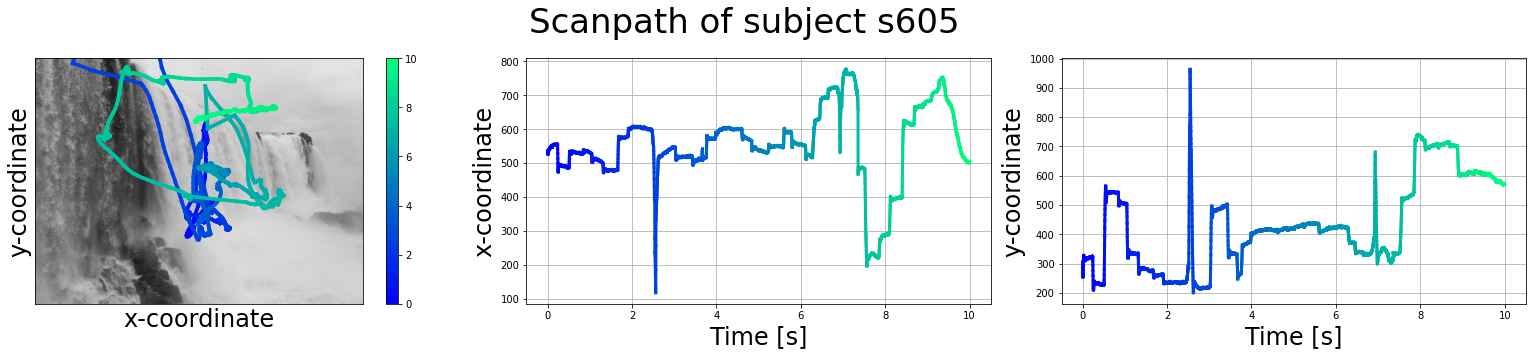

===========> Loading npz data from natural images


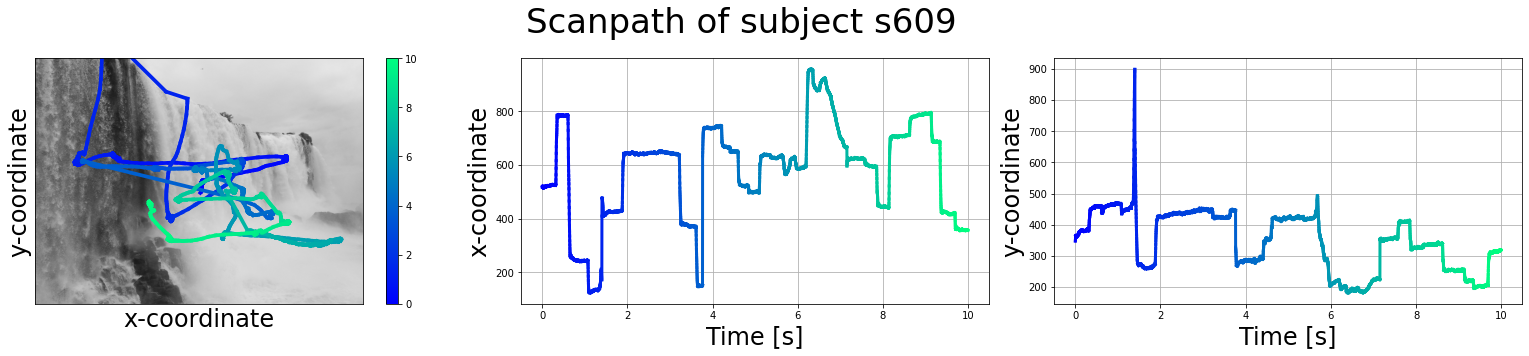

===========> Loading npz data from natural images


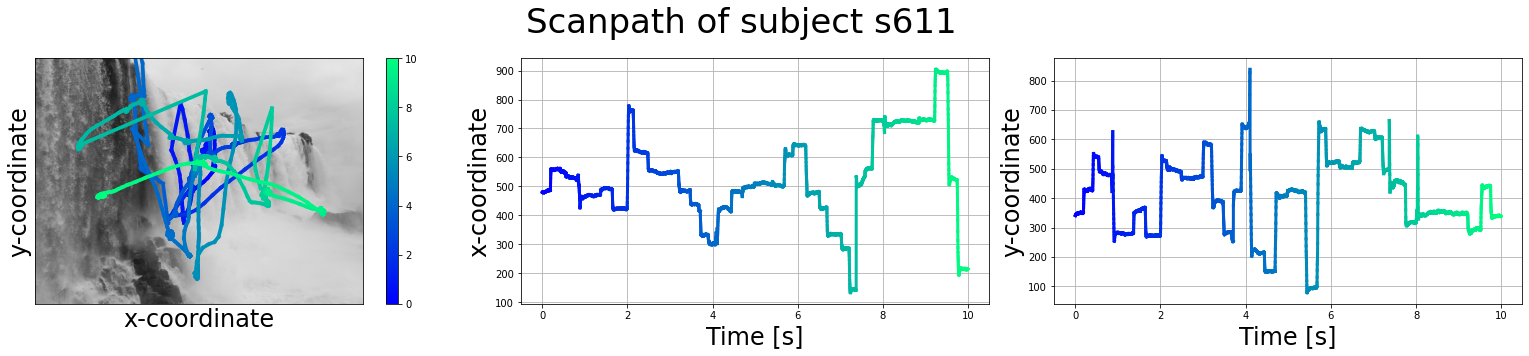

===========> Loading npz data from natural images


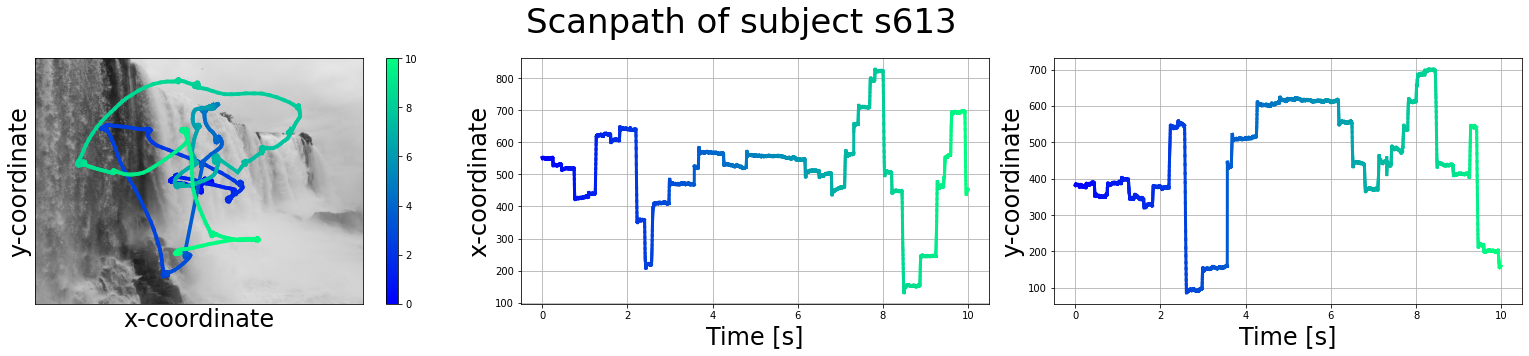

===========> Loading npz data from natural images


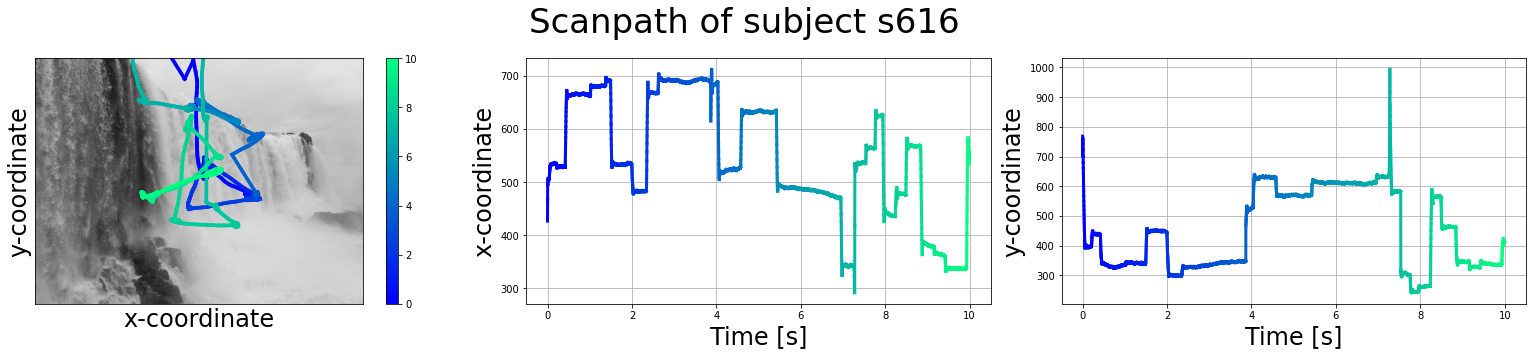

===========> Loading npz data from natural images


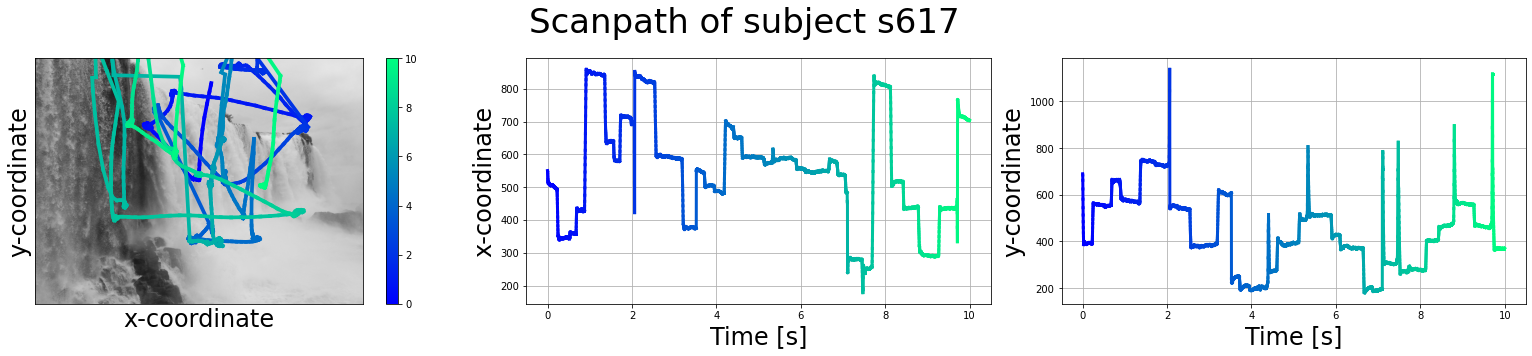

===========> Loading npz data from natural images


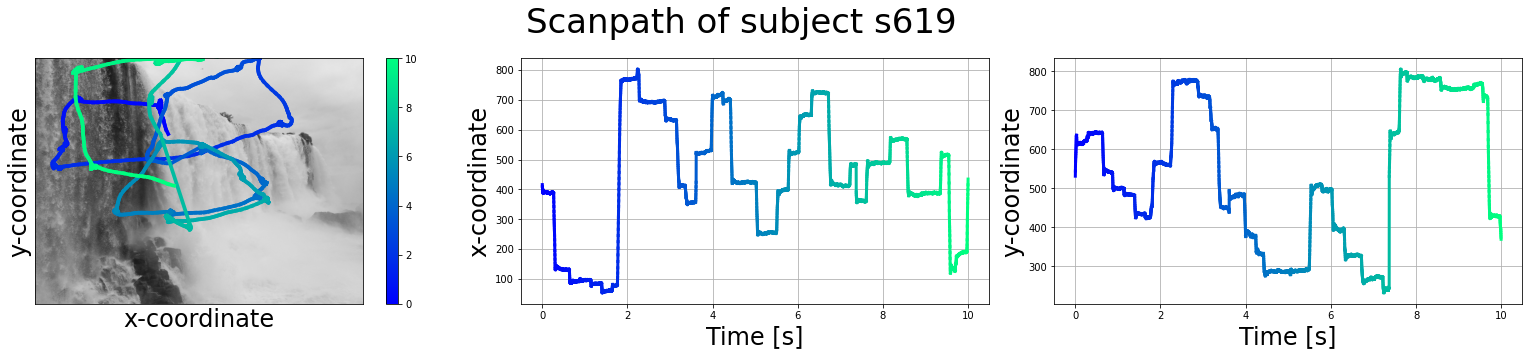

===========> Loading npz data from natural images


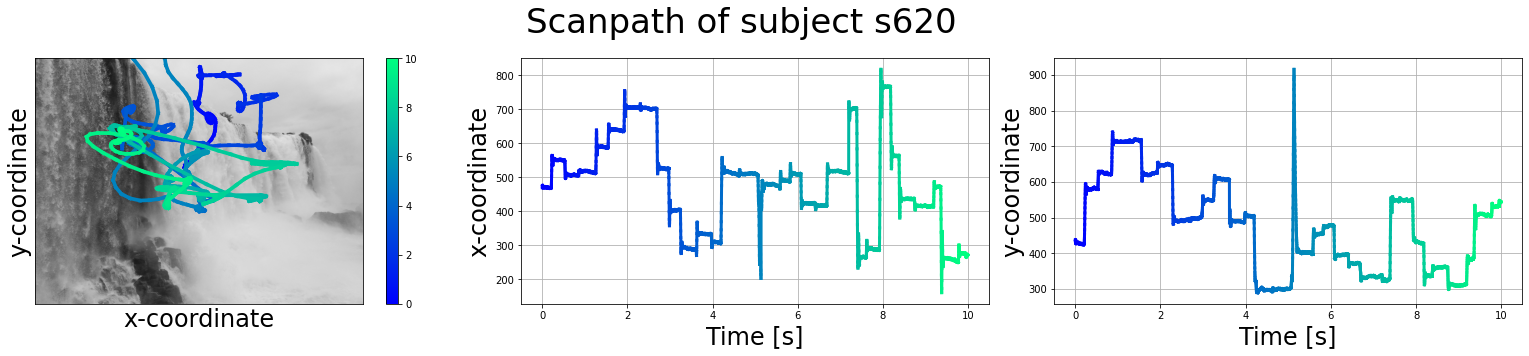

===========> Loading npz data from natural images


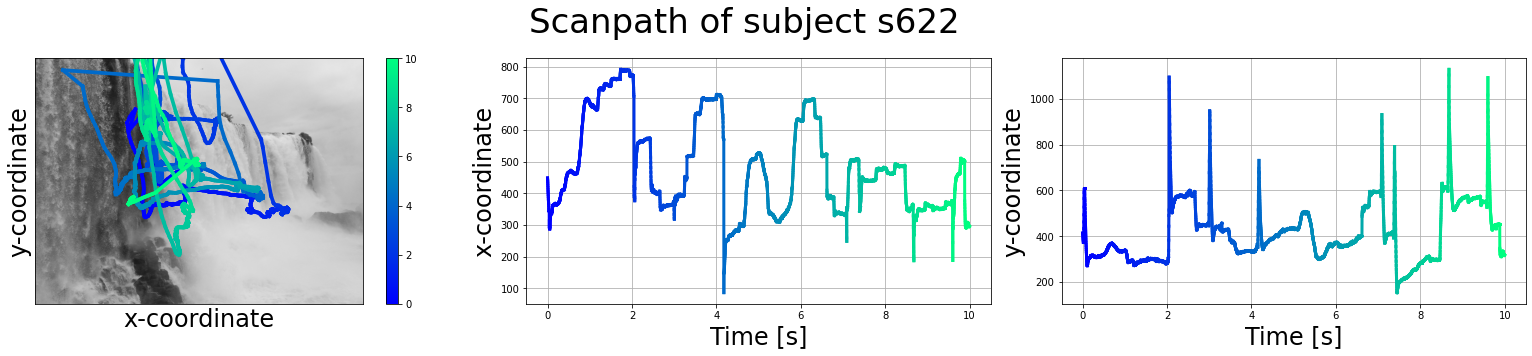

In [28]:
predIMG = "natural"
TRAIN_IMG_TYPE = "natural"
x_lim = (0, 5000)


for SUBJECT in ["s605", "s609", "s611", "s613", "s616", "s617", "s619", "s620", "s622"]:
#for SUBJECT in ["s605"]:
    fig, ax = plt.subplots(1,3,figsize=(22,5))
    for j, h in enumerate([1]):
        results_filepath = results_filepaths[0] #no matter what model select
        N, Nt = horizons[h][model_name]
        #print(results_filepath)
        subject_results = f"SUBJECT_{SUBJECT}-tIMG_{TRAIN_IMG_TYPE}-N_{N}-Nt_{Nt}"
        subject_results = list(filter(lambda filename: subject_results in filename, os.listdir(results_filepath)))[0]
        subject_results_filepath = os.path.join(results_filepath, subject_results)

        # Get results
        y_real, _ = load_npz(subject_results_filepath, img_type=predIMG, get_mcdropout_results=False)

        # Plot selected image and scanpath
        img = cv2.imread(f"../diagrams/image_types/casc_li.jpg")[::-1]
        img = cv2.resize(img, (WIDTH, HEIGHT))
        ax[0].imshow(img)
        
        
        N_POINTS = len(y_real["x"][x_lim[0]:x_lim[1]])
        
        cm = plt.get_cmap("winter")
        cmap = [cm(1.*i/(N_POINTS-1)) for i in range(N_POINTS-1)]
        cmappable = ScalarMappable(norm=Normalize(x_lim[0]*2/1000, x_lim[1]*2/1000), cmap=cm)
        
        x_coord = y_real["x"][x_lim[0]:x_lim[1]]
        y_coord = y_real["y"][x_lim[0]:x_lim[1]]
        for i in range(N_POINTS-1):
            ax[0].plot(
                x_coord.values[i:i+2], 
                y_coord.values[i:i+2],
                color=cmap[i],
                linewidth=3.7
            )
        ax[0].set_xlim(0, WIDTH)
        ax[0].set_ylim(0, HEIGHT)
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        ax[0].set_xlabel("x-coordinate", fontsize=24)
        ax[0].set_ylabel("y-coordinate", fontsize=24)
        fig.colorbar(cmappable,ax=ax[0],location='right')
        
        for i in range(N_POINTS-1):
            ax[1].plot(
                (np.arange(x_lim[0], x_lim[1])*2/1000)[i:i+2], 
                x_coord.reset_index(drop=True).values[i:i+2],
                color=cmap[i],
                linewidth=3.
            )
        ax[1].set_xlabel("Time [s]", fontsize=24)
        ax[1].set_ylabel("x-coordinate", fontsize=24)
        ax[1].grid()
        
        for i in range(N_POINTS-1):
            ax[2].plot(
                (np.arange(x_lim[0], x_lim[1])*2/1000)[i:i+2], 
                y_coord.reset_index(drop=True).values[i:i+2],  
                color=cmap[i],
                linewidth=3.
            )
        ax[2].set_xlabel("Time [s]", fontsize=24)
        ax[2].set_ylabel("y-coordinate", fontsize=24)
        ax[2].grid()
    fig.suptitle(f"Scanpath of subject {SUBJECT}", fontsize=34)
    fig.tight_layout()
    if is_save:
        savepath = os.path.join(SAVE_FOLDER, "ground_truth")
        if not os.path.exists(savepath):
            os.makedirs(savepath)
        fig.savefig(f"{os.path.join(savepath, f'{SUBJECT}_true_scanpath')}.png")
    plt.show()

===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images


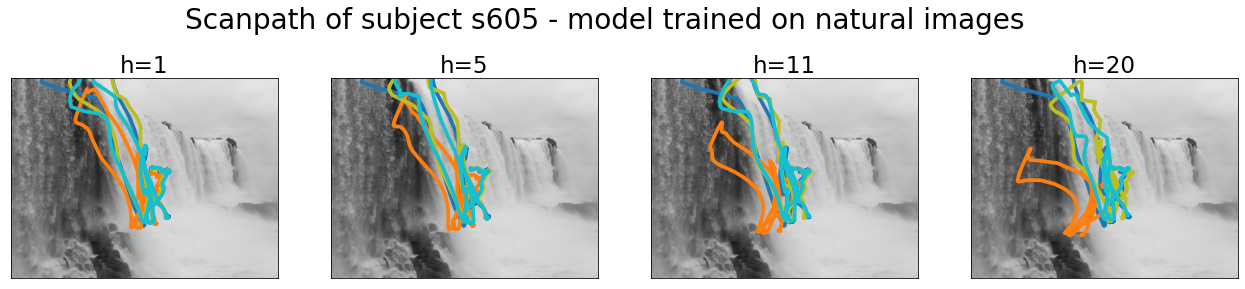

===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images


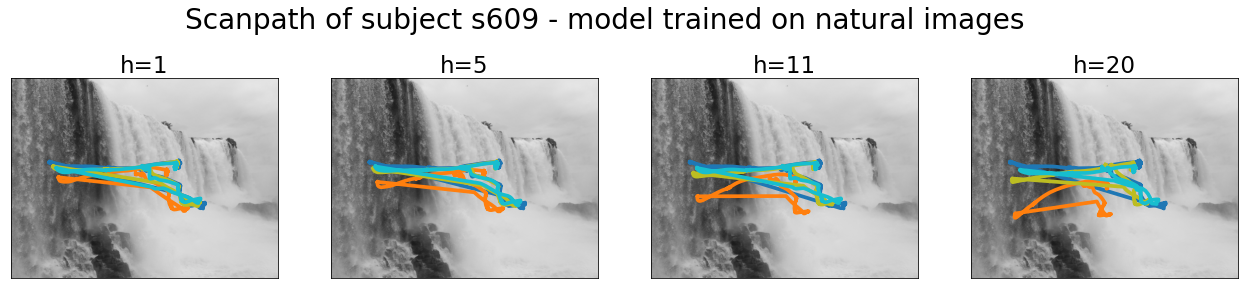

===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images


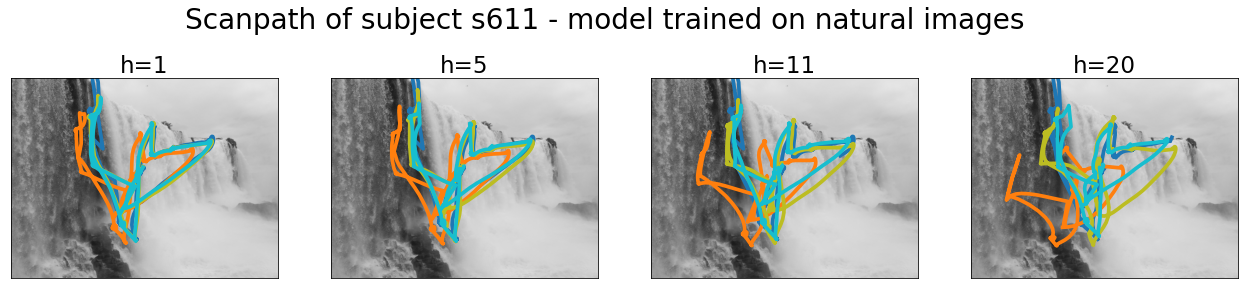

===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images


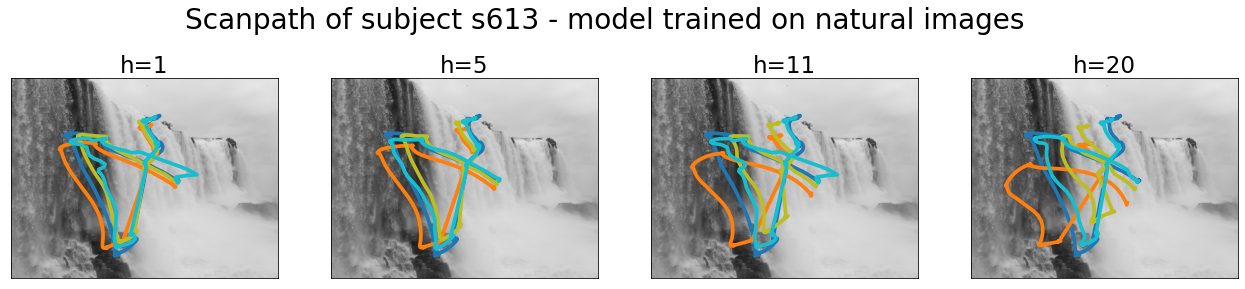

===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images


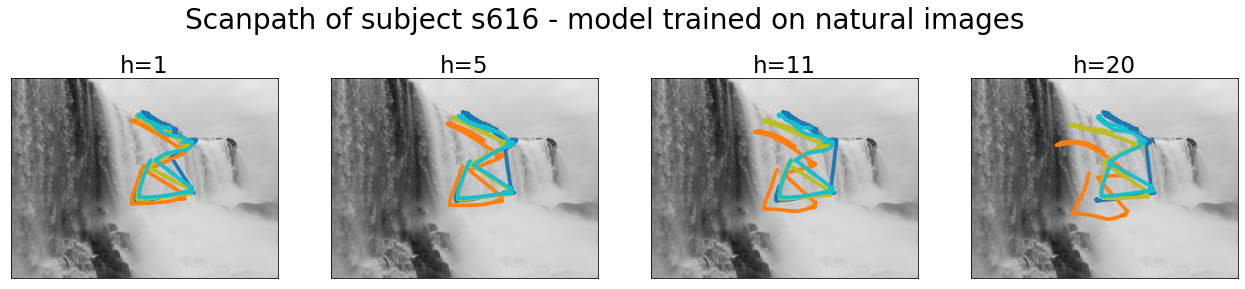

===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images


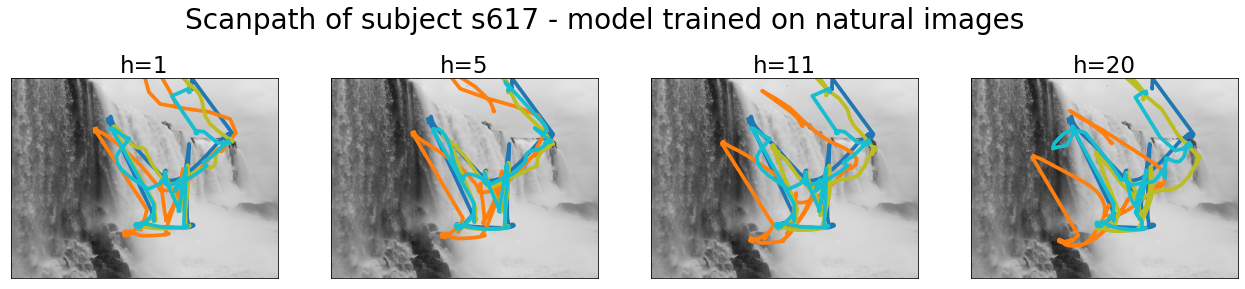

===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images


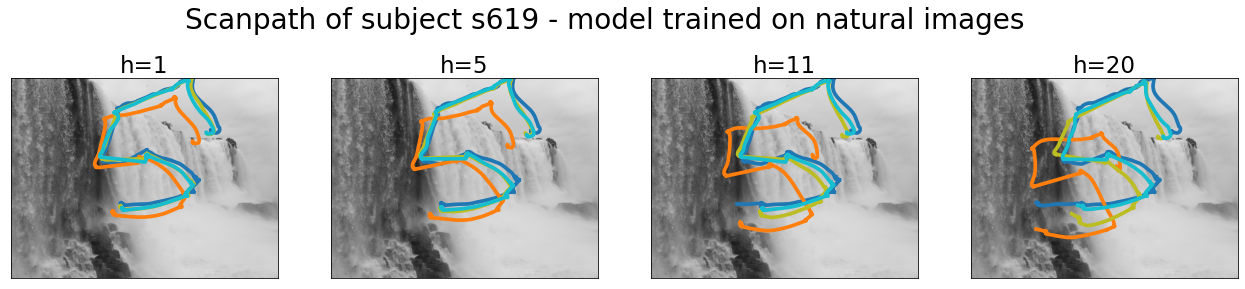

===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images


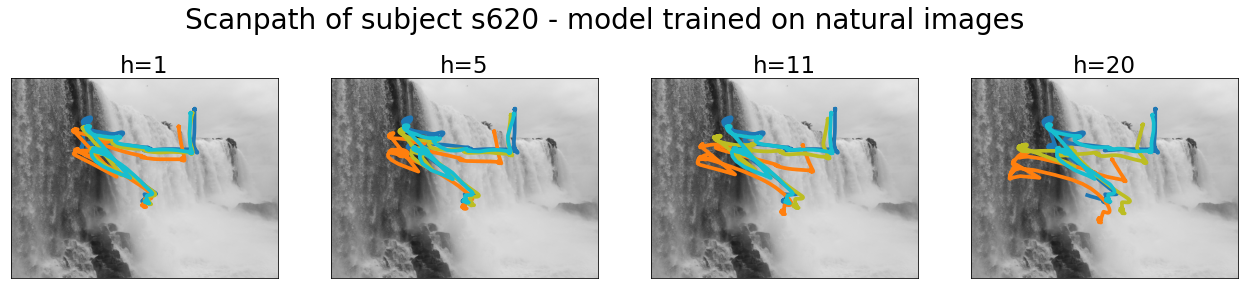

===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images


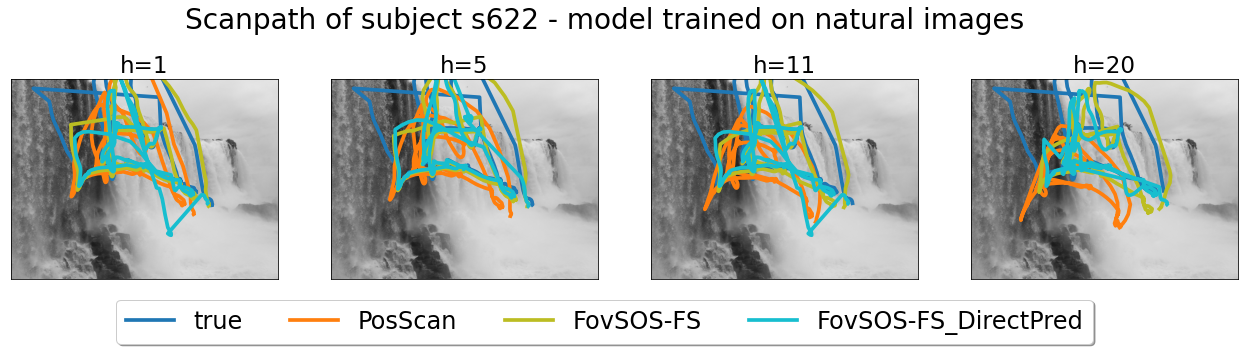

In [22]:
predIMG = "natural"
TRAIN_IMG_TYPE = "natural"
#h = 1
x_lim = (1000, 2500)

for SUBJECT in ["s605", "s609", "s611", "s613", "s616", "s617", "s619", "s620", "s622"]:
#for SUBJECT in ["s605"]:
    fig, ax = plt.subplots(1,4,figsize=(22,5), sharex=True, sharey=True)
    for j, h in enumerate([1, 5, 11, 20]):
        for i, (model_name, results_filepath) in enumerate(zip(models_for_compare, results_filepaths)):
            N, Nt = horizons[h][model_name]
            #print(results_filepath)
            subject_results = f"SUBJECT_{SUBJECT}-tIMG_{TRAIN_IMG_TYPE}-N_{N}-Nt_{Nt}"
            subject_results = list(filter(lambda filename: subject_results in filename, os.listdir(results_filepath)))[0]
            subject_results_filepath = os.path.join(results_filepath, subject_results)
            #print(subject_results_filepath)

            # Get results
            y_real, y_pred = load_npz(subject_results_filepath, img_type=predIMG, get_mcdropout_results=False)

            # Plot selected image and scanpath
            img = cv2.imread(f"../diagrams/image_types/casc_li.jpg")[::-1]
            img = cv2.resize(img, (WIDTH, HEIGHT))
            ax[j].imshow(img)
            if i == 0:
                line2, = ax[j].plot(0, 0, linewidth=3.7)
                if j == 3:
                    line2.set_label(f"true")
                line2.set_color("C0")  
                line2.set_xdata(y_real["x"][x_lim[0]:x_lim[1]])
                line2.set_ydata(y_real["y"][x_lim[0]:x_lim[1]])

            line1, = ax[j].plot(0, 0, linewidth=3.7)
            if j == 3:
                line1.set_label(f"{model_name}")
            if i == 0:
                color = f"C{i+1}"
            else:
                color = f"C{i+7}"
            line1.set_color(color)  
            line1.set_xdata(y_pred["x"][x_lim[0]:x_lim[1]])
            line1.set_ydata(y_pred["y"][x_lim[0]:x_lim[1]])
            ax[j].set_xlim(0, WIDTH)
            ax[j].set_ylim(0, HEIGHT)
            ax[j].set_title(f"h={h}", fontsize=23)
            ax[j].set_xticks([])
            ax[j].set_yticks([])
            #ax[j].set_xlabel("x-coordinate", fontsize=16)
    #ax[0].set_ylabel("y-coordinate", fontsize=16)
    if SUBJECT == "s622":
        fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.2), #bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=4, prop={'size': 24})
    
    fig.suptitle(f"Scanpath of subject {SUBJECT} - model trained on {TRAIN_IMG_TYPE} images", fontsize=28)
    #fig.tight_layout()
    if is_save:
        savepath = os.path.join(SAVE_FOLDER, "v2")
        if not os.path.exists(savepath):
            os.makedirs(savepath)
        fig.savefig(f"{os.path.join(savepath, f'{SUBJECT}_scanpath')}.png", bbox_inches='tight')
    plt.show()

In [23]:
create_video = True
subject = "s613"

In [24]:
def generate_data(subject="s613", TRAIN_IMG_TYPE="natural", predIMG="natural", x_lim=(1000, 1600)):
    HORIZONS=[1, 5, 11, 20]
    data_horizons = []
    for j, h in enumerate(HORIZONS):
        data_models  = []
        for i, (model_name, results_filepath) in enumerate(zip(models_for_compare, results_filepaths)):
            N, Nt = horizons[h][model_name]
            subject_results = f"SUBJECT_{subject}-tIMG_{TRAIN_IMG_TYPE}-N_{N}-Nt_{Nt}"
            subject_results = list(filter(lambda filename: subject_results in filename, os.listdir(results_filepath)))[0]
            subject_results_filepath = os.path.join(results_filepath, subject_results)
            # Get results
            y_real, y_pred = load_npz(subject_results_filepath, img_type=predIMG, get_mcdropout_results=False)
            y_real = y_real[x_lim[0]:x_lim[1]].values
            y_pred = y_pred[x_lim[0]:x_lim[1]].values
            if i == 0:
                data_models.append(y_real)
            data_models.append(y_pred)
        data_horizons.append(data_models)   
    for k in range(x_lim[1]-x_lim[0]):
        y_horizons = []
        for data_models in data_horizons:
            d_m = []
            for p, y_p in enumerate(data_models):
                d_m.append(y_p[:k])
            y_horizons.append(d_m)
        yield y_horizons

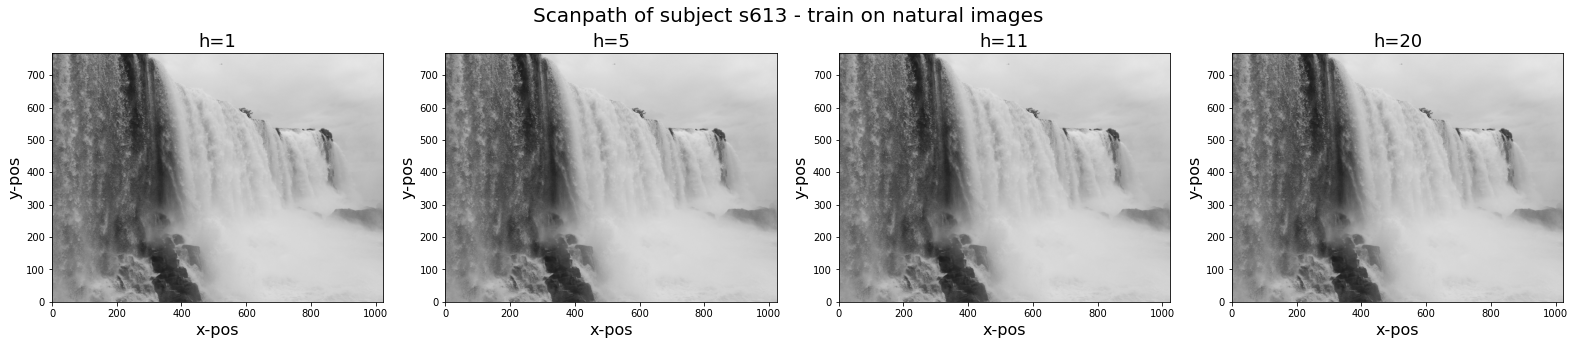

In [25]:
if create_video:
    fig, ax = plt.subplots(1, 4, figsize=(22,12))
    # Plot selected image and scanpath
    img = cv2.imread(f"../diagrams/image_types/casc_li.jpg")[::-1]
    img = cv2.resize(img, (WIDTH, HEIGHT))
    for j, ax_j in enumerate(ax):
        ax_j.imshow(img)
        ax_j.set_xlim(0, WIDTH)
        ax_j.set_ylim(0, HEIGHT)
        ax_j.set_title(f"h={list(horizons.keys())[j]}", fontsize=18)
        ax_j.set_xlabel("x-pos", fontsize=16)
        ax_j.set_ylabel("y-pos", fontsize=16)
    #ax_j.legend()
    fig.suptitle(f"Scanpath of subject {subject} - train on {TRAIN_IMG_TYPE} images", y=0.68, fontsize=20)
    fig.tight_layout()

In [26]:
def animation_frame(data):
    data_horizons = data
    lines = []
    for h, data_horizon in enumerate(data_horizons):
        line2, = ax[h].plot(0, 0)
        line2.set_color("C0")  
        line2.set_xdata(data_horizon[0][:, 0])
        line2.set_ydata(data_horizon[0][:, 1])
        lines.append(line2)
        for i in range(1, len(data_horizons)):
            line1, = ax[h].plot(0, 0)
            if i == 1:
                color = f"C{i}"
            else:
                color = f"C{i+6}"
            line1.set_color(color)  
            line1.set_xdata(data_horizon[i][:, 0])
            line1.set_ydata(data_horizon[i][:, 1])
            lines.append(line1)
    for i, ax_leg in enumerate(ax[h].legend().texts):
        if i == 0:
            ax_leg.set_text("true")
        else:
            ax_leg.set_text(models_for_compare[i-1])
    return lines

In [27]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as manimation
from IPython.display import HTML


FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Scan-Paths Prediction', artist='Camilo Jara',
                comment='Scan-Paths')
writer = FFMpegWriter(fps=60, metadata=metadata)

if create_video:
    animation = FuncAnimation(fig, func=animation_frame, frames=generate_data, interval=2, save_count=sys.maxsize)
    animation.save(f'scanpath_test.mp4', writer=writer)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images
===========> Loading npz data from natural images


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/camilojd/anaconda3/envs/scanpath-env/lib/python3.7/site-packages/matplotlib/animation.py", line 236, in saving
    yield self
  File "/home/camilojd/anaconda3/envs/scanpath-env/lib/python3.7/site-packages/matplotlib/animation.py", line 1173, in save
    anim._draw_next_frame(d, blit=False)
  File "/home/camilojd/anaconda3/envs/scanpath-env/lib/python3.7/site-packages/matplotlib/animation.py", line 1209, in _draw_next_frame
    self._post_draw(framedata, blit)
  File "/home/camilojd/anaconda3/envs/scanpath-env/lib/python3.7/site-packages/matplotlib/animation.py", line 1234, in _post_draw
    self._fig.canvas.draw_idle()
  File "/home/camilojd/anaconda3/envs/scanpath-env/lib/python3.7/site-packages/matplotlib/backend_bases.py", line 2055, in draw_idle
    self.draw(*args, **kwargs)
  File "/home/camilojd/anaconda3/envs/scanpath-env/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py", line 406, in draw
    self.figure.draw(self.

TypeError: object of type 'NoneType' has no len()